In [1]:
#Import necessary modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

In [5]:
#load the datasets and inspect them.
netflix_stocks = pd.read_csv("NFLXdaily.csv")
dowjones_stocks = pd.read_csv("DJI2019.csv")
netflix_stocks_quarterly = pd.read_csv("NFLX2019q.csv")
netflix_stocks = netflix_stocks.rename(columns={"Adj Close":"Price"})
netflix_stocks_quarterly = netflix_stocks_quarterly.rename(columns={"Adj Close":"Price"})
dowjones_stocks = dowjones_stocks.rename(columns={"Adj Close":"Price"})
print(netflix_stocks.head())
print(dowjones_stocks.head())
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close       Price  \
0  2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1  2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2  2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3  2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4  2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   

     Volume  
0  11679500  
1  14969600  
2  19330100  
3  18620100  
4  15359200  
         Date          Open          High           Low         Close  \
0  2019-01-02  23058.609375  23413.470703  22928.589844  23346.240234   
1  2019-01-03  23176.390625  23176.390625  22638.410156  22686.220703   
2  2019-01-04  22894.919922  23518.640625  22894.919922  23433.160156   
3  2019-01-07  23474.259766  23687.740234  23301.589844  23531.349609   
4  2019-01-08  23680.320313  23864.650391  23581.449219  23787.449219   

          Pric

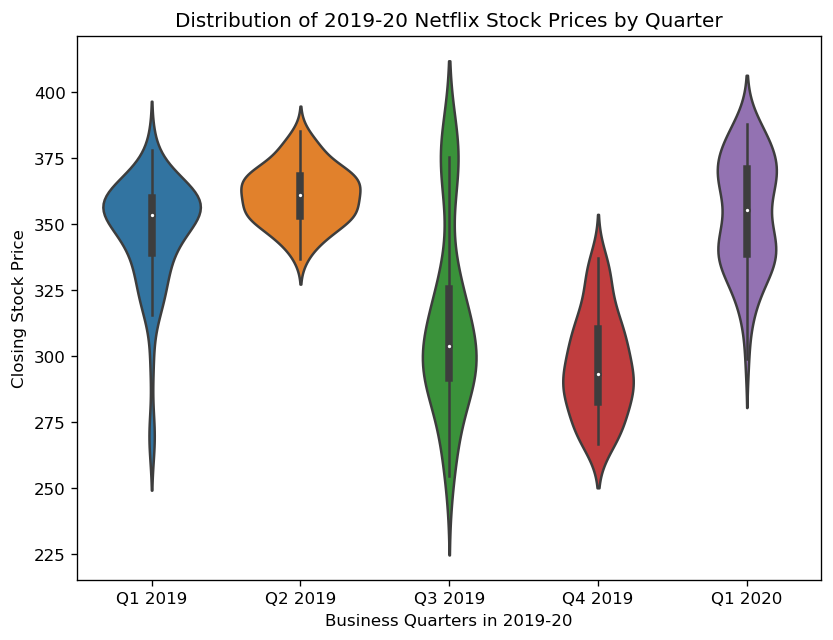

In [6]:
#Violin plot - Stock price vs. Business quarters
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
ax = sns.violinplot()
sns.violinplot(data=netflix_stocks_quarterly,x="Quarter",y="Price")
ax.set_title("Distribution of 2019-20 Netflix Stock Prices by Quarter")
ax.set_xlabel("Business Quarters in 2019-20")
ax.set_ylabel("Closing Stock Price")
#plt.savefig("violin.png",bbox_inches='tight')
plt.show()

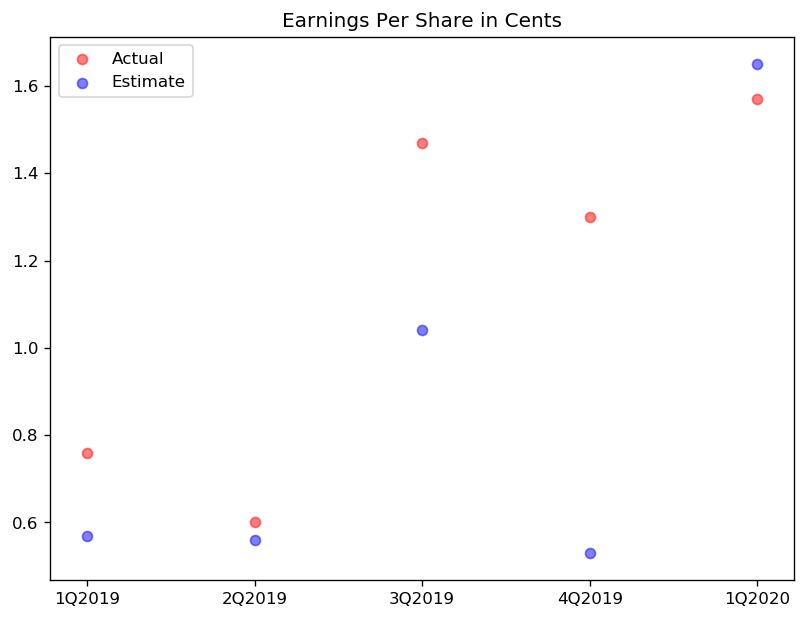

In [8]:
#Scatter plot - Actual EPS vs Estimated EPS
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
x_positions = [1, 2, 3, 4, 5]
chart_labels = ["1Q2019","2Q2019","3Q2019","4Q2019","1Q2020"]
earnings_estimate =[0.57, .56, 1.04, .53, 1.65]
earnings_actual = [.76, .6, 1.47, 1.3, 1.57]
plt.scatter(x_positions, earnings_actual, color="red", alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color="blue", alpha=0.5)
plt.legend(["Actual","Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
#plt.savefig("scatter.png",bbox_inches='tight')
plt.show()

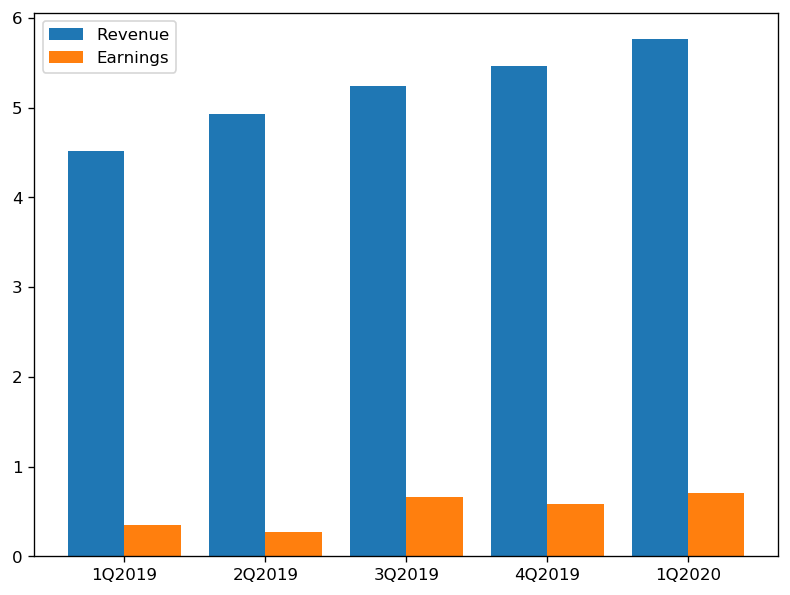

In [9]:
#Side-by-side bar plot for earnings and revenue
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# The metrics below are in billions of dollars
revenue_by_quarter = [4.52099, 4.92311, 5.24490, 5.46743, 5.76769]
earnings_by_quarter = [0.34405, .27065, .66524, .58697, .70906]
quarter_labels = ["1Q2019","2Q2019","3Q2019","4Q2019", "1Q2020"]
# Revenue
n = 1
t = 2
d = 5
w = 0.8
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)

# Earnings
n = 2
t = 2
d = 5
w = 0.8
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.xticks(middle_x, quarter_labels)
#plt.savefig("bar.png",bbox_inches='tight')
plt.show()

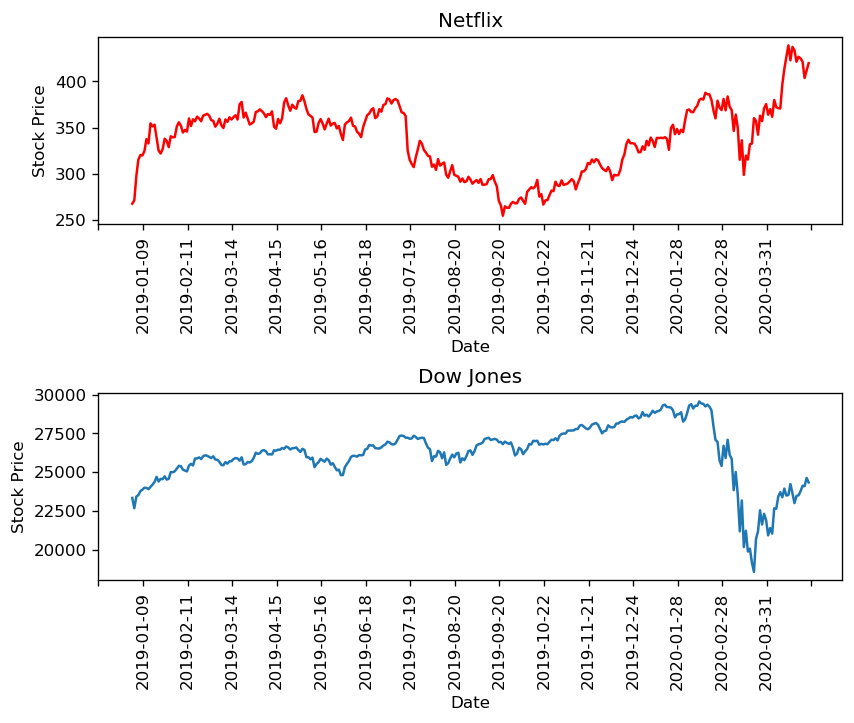

In [10]:
#Line plots - Dow Jones and Netflix
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# Upper plot Netflix
ax1 = plt.subplot(2, 1, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'], color="red")
ax1.set_title("Netflix")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price")
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 22))
plt.xticks(rotation=90)
# Below plot Dow Jones
ax2 = plt.subplot(2,1,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title("Dow Jones")
ax2.set_xlabel("Date")
ax2.set_ylabel("Stock Price")
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 22))
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.9)
#plt.savefig("line.png",bbox_inches='tight')
plt.show()